# Problem Sequence:
## 1- import libraries & read data
## 2- clean and preprocess data
## 3- train test split the data
## 4- apply BOW & TF-IDF
## 5- Train and Evaluate Models

# import libraries

In [1]:
import numpy as np
import pandas as pd

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Read Data

In [6]:
messages=pd.read_csv('sms collection.csv',sep='\t',names=['label','message'])

In [7]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Clean and preprocess Data

In [11]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [12]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

# Split the data

In [68]:
le=LabelEncoder()
y=le.fit_transform(messages['label'])

In [69]:
le.classes_

array(['ham', 'spam'], dtype=object)

# ham:0 Spam:1

In [30]:
len(y)

5572

In [104]:
x_train,x_test,y_train,y_test=train_test_split(corpus,y,test_size=0.2,stratify=y,random_state=42)

# Applying BOW

In [79]:
cv=CountVectorizer(max_features=2500,ngram_range=(1,2))

In [80]:
x_train=cv.fit_transform(x_train).toarray()
x_test=cv.transform(x_test).toarray()

In [81]:
np.set_printoptions(edgeitems=30,linewidth=10000,formatter=dict(float=lambda x : "%.3g"% x))
x_train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

In [82]:
cv.vocabulary_

{'guy': 908,
 'close': 364,
 'pleas': 1596,
 'come': 388,
 'town': 2166,
 'import': 1034,
 'moro': 1376,
 'ok': 1488,
 'sri': 1968,
 'knw': 1117,
 'tat': 2054,
 'askd': 110,
 'see': 1813,
 'yeah': 2478,
 'swing': 2041,
 'bit': 180,
 'got': 855,
 'thing': 2097,
 'take': 2045,
 'care': 291,
 'take care': 2046,
 'shall': 1860,
 'book': 194,
 'half': 917,
 'thank': 2088,
 'messag': 1316,
 'realli': 1704,
 'appreci': 89,
 'sure': 2031,
 'process': 1662,
 'direct': 542,
 'pay': 1552,
 'find': 687,
 'way': 2345,
 'back': 139,
 'test': 2077,
 'tomorrow': 2145,
 'class': 360,
 'wonder': 2421,
 'day': 495,
 'feb': 671,
 'lt': 1238,
 'gt': 876,
 'love': 1223,
 'send': 1826,
 'di': 530,
 'ur': 2237,
 'valu': 2285,
 'frnd': 743,
 'marri': 1281,
 'person': 1563,
 'luv': 1249,
 'lose': 1215,
 'lt gt': 1240,
 'day send': 500,
 'come back': 389,
 'chines': 342,
 'food': 707,
 'get': 775,
 'fat': 667,
 'free': 719,
 'nokia': 1448,
 'motorola': 1378,
 'mth': 1389,
 'price': 1647,
 'net': 1421,
 'min': 13

# Testing models

In [83]:
models={'XGBclassifier':XGBClassifier(),'adb':AdaBoostClassifier(),'GB':GradientBoostingClassifier(),"Logistic_regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"Random_forest":RandomForestClassifier()}

In [84]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given dictionary of models
    x,_train "training data
    x_test testing data
    y_train training labels
    y_test testing labels
    """
    np.random.seed(42)
    model_scores={}
    for name , model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores    

In [85]:
fit_and_score(models,x_train,x_test,y_train,y_test)

{'XGBclassifier': 0.9748878923766816,
 'adb': 0.9713004484304932,
 'GB': 0.9713004484304932,
 'Logistic_regression': 0.9820627802690582,
 'KNN': 0.9264573991031391,
 'Random_forest': 0.9766816143497757}

In [93]:
scores={'XGBclassifier': 0.9748878923766816,
 'adb': 0.9713004484304932,
 'GB': 0.9713004484304932,
 'Logistic_regression': 0.9820627802690582,
 'KNN': 0.9264573991031391,
 'Random_forest': 0.9766816143497757}

# Comparing models

<Axes: >

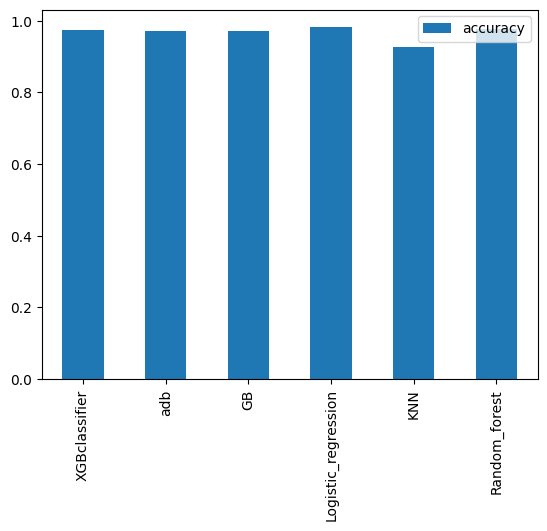

In [94]:
pd.DataFrame(scores,index=['accuracy']).T.plot.bar()

# Logistic Regrerssion

In [95]:
model=LogisticRegression()

In [96]:
model.fit(x_train,y_train)

LogisticRegression()

In [97]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Poor recall

<Axes: >

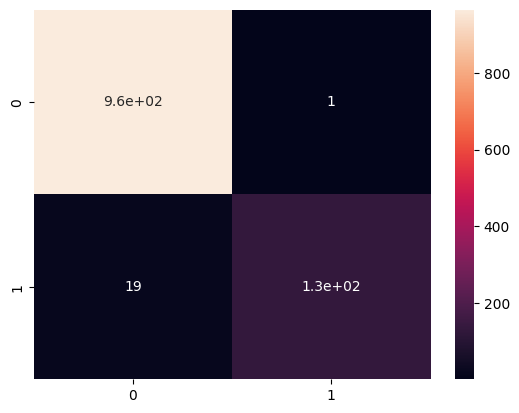

In [98]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True)

# Cross validation using the whole data

In [99]:
cross_val_score(model,cv.transform(x),y,cv=5)

array([0.984, 0.984, 0.983, 0.979, 0.984])

# Using TF-IDF

In [102]:
tv=TfidfVectorizer(max_features=2500,ngram_range=(1,2))

In [105]:
x_train=tv.fit_transform(x_train).toarray()
x_test=tv.transform(x_test).toarray()

# Testing models

In [106]:
models={'XGBclassifier':XGBClassifier(),'adb':AdaBoostClassifier(),'GB':GradientBoostingClassifier(),"Logistic_regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"Random_forest":RandomForestClassifier()}

In [107]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given dictionary of models
    x,_train "training data
    x_test testing data
    y_train training labels
    y_test testing labels
    """
    np.random.seed(42)
    model_scores={}
    for name , model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores    

In [108]:
scores=fit_and_score(models,x_train,x_test,y_train,y_test)

In [109]:
scores

{'XGBclassifier': 0.9775784753363229,
 'adb': 0.9704035874439462,
 'GB': 0.968609865470852,
 'Logistic_regression': 0.9739910313901345,
 'KNN': 0.9255605381165919,
 'Random_forest': 0.9775784753363229}

# Comparing models

<Axes: >

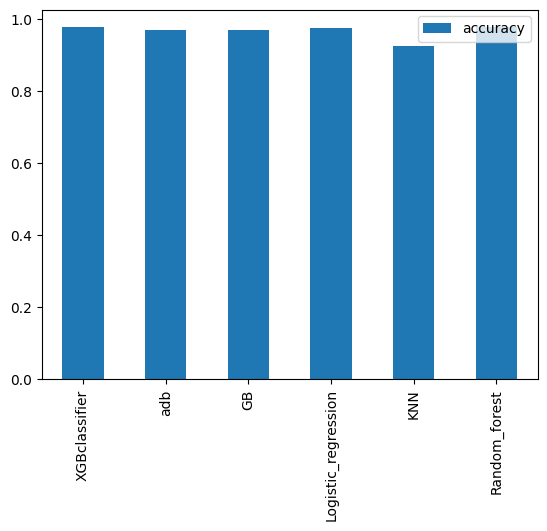

In [110]:
pd.DataFrame(scores,index=['accuracy']).T.plot.bar()

In [112]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [113]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.87      0.91       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Poor recall

<Axes: >

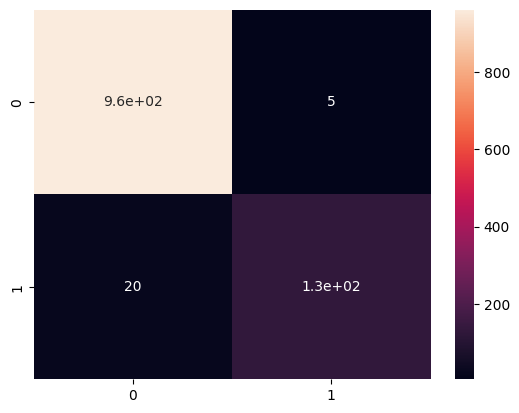

In [114]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True)

# Cross validation using the whole data

In [115]:
cross_val_score(model,tv.transform(x),y,cv=5)

array([0.973, 0.978, 0.978, 0.975, 0.974])